In [1]:
import scipy.integrate
from scipy.integrate import odeint
import numpy as np
import matplotlib.pylab as plt
import time

%matplotlib inline
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from scipy.interpolate import spline

### Generic NTPDase 1 - ATP degradation to ADP and AMP 
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2254478/

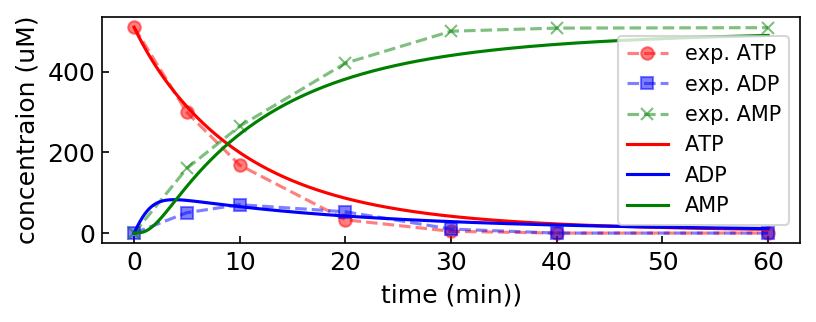

In [6]:
# Exp 
time   = np.array([0,5,10,20,30,40,60])
ATPexp = np.array([509.8901099,298.9010989,168.1318681,32.96703297,4.395604396,0,0])
ADPexp = np.array([0,50.54945055,70.32967033,52.74725275,9.89010989,0,0])
AMPexp = np.array([0,160.4395604,264.8351648,420.8791209,500,507.6923077,508.7912088])

def func(y,t):
    ATP,ADP,AMP = y
    
    k1f = 0.0018
    k1b = 0.001 
    k2 = 0.00008
    
    dATPdt = -k1f*ATP + k1b*ADP
    dADPdt = k1f*ATP - k1b*ADP - k2*ADP**2
    dAMPdt = k2*ADP**2
    
    dydt = [dATPdt, dADPdt, dAMPdt]
    
    return dydt

t = scipy.linspace(0,3600,3600)

y0 = np.array([510,0,0])
y = scipy.integrate.odeint(func,y0,t)

plt.figure(figsize=(6,2),dpi=150)
plt.tick_params(labelsize=12,direction='in')

plt.plot(time,ATPexp,'r--o',alpha=0.5,label="exp. ATP")
plt.plot(time,ADPexp,'b--s',alpha=0.5,label="exp. ADP")
plt.plot(time,AMPexp,'g--x',alpha=0.5,label="exp. AMP")
plt.plot(t/60,y[:,0],'r-',alpha=1,label='ATP')
plt.plot(t/60,y[:,1],'b-',alpha=1,label='ADP')
plt.plot(t/60,y[:,2],'g-',alpha=1,label='AMP')

plt.xlabel("time (min))",fontsize=12)
plt.ylabel("concentraion (uM)",fontsize=12)
plt.legend(loc=0,fontsize=10)    

## Further complicated model 
- https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0031205&type=printable
- ATP metabolism as function of CD39 (polarization)

In [12]:
# Resident 
time = np.array([0,20,40,60,120])
## ATP metabolism
ATPres = np.array([145.7446809,68.08510638,26.59574468,8.510638298,0])
ADPres = np.array([0,8.510638298,7.446808511,0,0])
AMPres1 = np.array([0,29.78723404,41.4893617,35.10638298,23.40425532])
## AMP metabolism
AMPres2 = np.array([141.4893617,86.17021277,32.9787234,7.446808511,0])
ADOres = np.array([0,28.72340426,43.61702128,24.46808511,0])
INOres = np.array([0,13.82978723,64.89361702,78.72340426,103.1914894])

# M1
## ATP metabolism
ATPm1 = np.array([143.6170213,120.212766,44.68085106,20.21276596,0])
ADPm1 = np.array([0,3.191489362,10.63829787,2.127659574,0])
AMPm11 = np.array([0,14.89361702,51.06382979,63.82978723,52.12765957])
## AMP metabolism
AMPm12 = np.array([141.4893617,105.3191489,76.59574468,53.19148936,10.63829787])
ADOm1 = np.array([0,18.08510638,31.91489362,12.76595745,0])
INOm1 = np.array([0,24.46808511,50,58.5106383,100])

# M2
## ATP metabolism
ATPm2 = np.array([145.7446809,51.06382979,21.27659574,12.76595745,0])
ADPm2 = np.array([0,13.82978723,8.510638298,6.382978723,0])
AMPm21 = np.array([0,24.46808511,57.44680851,44.68085106,19.14893617])
## AMP metabolism
AMPm22 = np.array([142.5531915,68.08510638,26.59574468,3.191489362,0])
ADOm2 = np.array([0,32.9787234,59.57446809,45.74468085,27.65957447])
INOm2 = np.array([0,32.9787234,45.74468085,79.78723404,93.61702128])

# CD39 
M1CD39 = 1
M2CD39 = 2.5
ResCD39 = 1.5

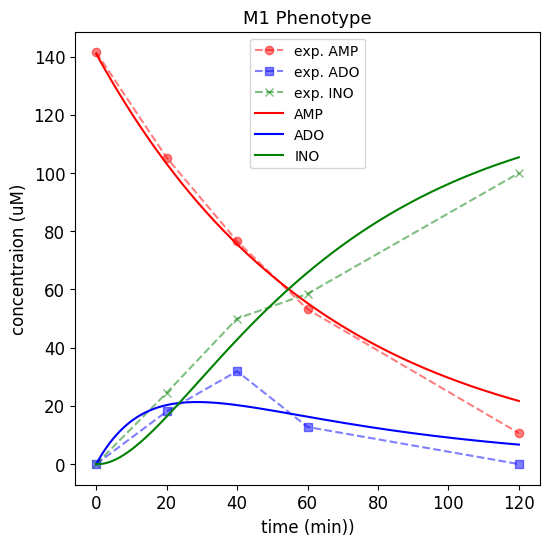

In [45]:
def func(y,t):
    AMP,ADO,INO = y
    
    k1 = 0.00026
    k2 = 0.0011
    deg = 0.001
    CD39 = 1
    
    dAMPdt = -k1*CD39*AMP
    dADOdt = k1*CD39*AMP - k2*ADO/CD39
    dINOdt = k2*ADO/CD39 - deg
    
    dydt = [dAMPdt, dADOdt, dINOdt]
    
    return dydt

t = scipy.linspace(0,60*120,60*120)

y0 = np.array([141,0,0])
y = scipy.integrate.odeint(func,y0,t)

plt.figure(figsize=(6,6),dpi=100)
plt.tick_params(labelsize=12)

plt.title('M1 Phenotype',fontsize=13)
plt.plot(time,AMPm12,'r--o',alpha=0.5,label="exp. AMP")
plt.plot(time,ADOm1,'b--s',alpha=0.5,label="exp. ADO")
plt.plot(time,INOm1,'g--x',alpha=0.5,label="exp. INO")
plt.plot(t/60,y[:,0],'r-',alpha=1,label='AMP')
plt.plot(t/60,y[:,1],'b-',alpha=1,label='ADO')
plt.plot(t/60,y[:,2],'g-',alpha=1,label='INO')

plt.xlabel("time (min))",fontsize=12)
plt.ylabel("concentraion (uM)",fontsize=12)
plt.legend(loc=0,fontsize=10)    

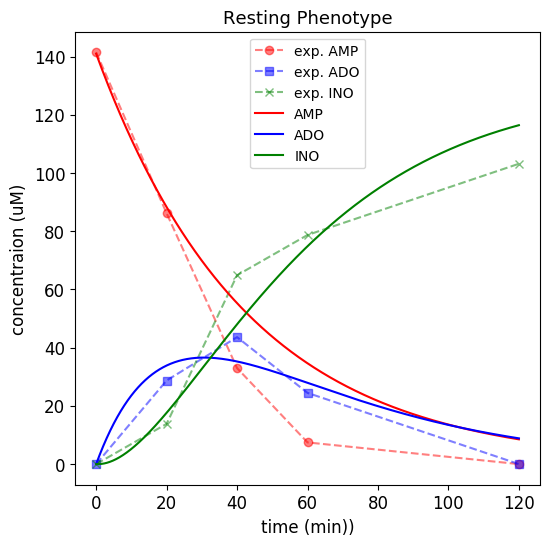

In [43]:
def func(y,t):
    AMP,ADO,INO = y
    
    k1 = 0.00026
    k2 = 0.0011
    CD39 = 1.5
    deg = 0.001
    
    dAMPdt = -k1*CD39*AMP
    dADOdt = k1*CD39*AMP - k2*ADO/CD39
    dINOdt = k2*ADO/CD39 - deg
    
    dydt = [dAMPdt, dADOdt, dINOdt]
    
    return dydt

t = scipy.linspace(0,60*120,60*120)

y0 = np.array([141,0,0])
y = scipy.integrate.odeint(func,y0,t)

plt.figure(figsize=(6,6),dpi=100)
plt.tick_params(labelsize=12)

plt.title('Resting Phenotype',fontsize=13)
plt.plot(time,AMPres2,'r--o',alpha=0.5,label="exp. AMP")
plt.plot(time,ADOres,'b--s',alpha=0.5,label="exp. ADO")
plt.plot(time,INOres,'g--x',alpha=0.5,label="exp. INO")
plt.plot(t/60,y[:,0],'r-',alpha=1,label='AMP')
plt.plot(t/60,y[:,1],'b-',alpha=1,label='ADO')
plt.plot(t/60,y[:,2],'g-',alpha=1,label='INO')

plt.xlabel("time (min))",fontsize=12)
plt.ylabel("concentraion (uM)",fontsize=12)
plt.legend(loc=0,fontsize=10)    

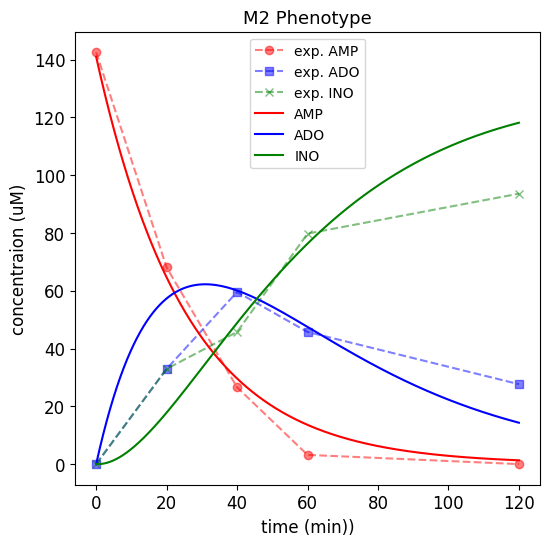

In [44]:
def func(y,t):
    AMP,ADO,INO = y
    
    k1 = 0.00026
    k2 = 0.0011
    CD39 = 2.5
    deg = 0.001
    
    dAMPdt = -k1*CD39*AMP
    dADOdt = k1*CD39*AMP - k2*ADO/CD39
    dINOdt = k2*ADO/CD39 - deg
    
    dydt = [dAMPdt, dADOdt, dINOdt]
    
    return dydt

t = scipy.linspace(0,60*120,60*120)

y0 = np.array([141,0,0])
y = scipy.integrate.odeint(func,y0,t)

plt.figure(figsize=(6,6),dpi=100)
plt.tick_params(labelsize=12)

plt.title('M2 Phenotype',fontsize=13)
plt.plot(time,AMPm22,'r--o',alpha=0.5,label="exp. AMP")
plt.plot(time,ADOm2,'b--s',alpha=0.5,label="exp. ADO")
plt.plot(time,INOm2,'g--x',alpha=0.5,label="exp. INO")
plt.plot(t/60,y[:,0],'r-',alpha=1,label='AMP')
plt.plot(t/60,y[:,1],'b-',alpha=1,label='ADO')
plt.plot(t/60,y[:,2],'g-',alpha=1,label='INO')

plt.xlabel("time (min))",fontsize=12)
plt.ylabel("concentraion (uM)",fontsize=12)
plt.legend(loc=0,fontsize=10)    

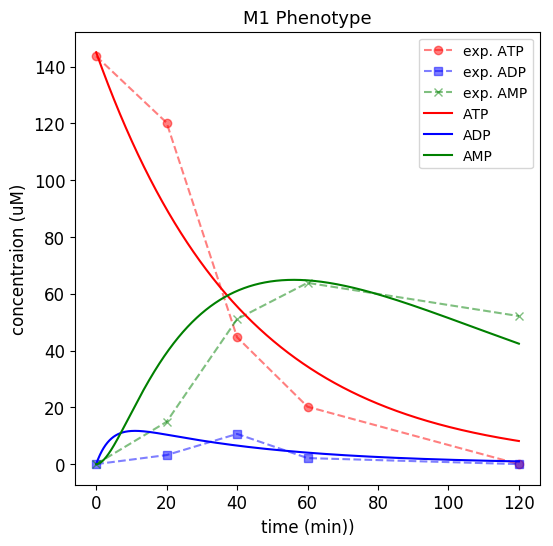

In [75]:
def func(y,t):
    ATP,ADP,AMP,ADO,INO = y
    
    kamp1 = 0.00026
    kamp2 = 0.0011
    degino = 0.001
    CD39 = 1
    katp1 = 0.0004
    katp2 = 0.0038

    dATPdt = -katp1*CD39*ATP  
    dADPdt = katp1*CD39*ATP - katp2*ADP*CD39
    dAMPdt = katp2*ADP*CD39 - kamp1*CD39*AMP
    dADOdt = kamp1*CD39*AMP - kamp2*ADO/CD39
    dINOdt = kamp2*ADO/CD39 - degino
    
    dydt = [dATPdt, dADPdt, dAMPdt, dADOdt, dINOdt]
    
    return dydt

t = scipy.linspace(0,60*120,60*120)

y0 = np.array([145,0,0,0,0])
y = scipy.integrate.odeint(func,y0,t)

plt.figure(figsize=(6,6),dpi=100)
plt.tick_params(labelsize=12)

plt.title('M1 Phenotype',fontsize=13)
plt.plot(time,ATPm1,'r--o',alpha=0.5,label="exp. ATP")
plt.plot(time,ADPm1,'b--s',alpha=0.5,label="exp. ADP")
plt.plot(time,AMPm11,'g--x',alpha=0.5,label="exp. AMP")
plt.plot(t/60,y[:,0],'r-',alpha=1,label='ATP')
plt.plot(t/60,y[:,1],'b-',alpha=1,label='ADP')
plt.plot(t/60,y[:,2],'g-',alpha=1,label='AMP')

plt.xlabel("time (min))",fontsize=12)
plt.ylabel("concentraion (uM)",fontsize=12)
plt.legend(loc=0,fontsize=10)    

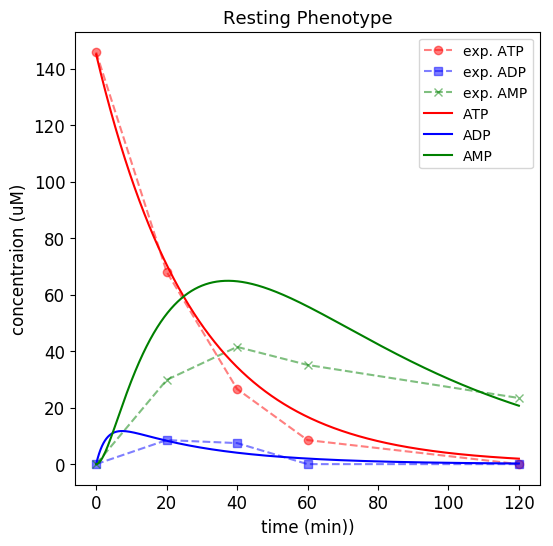

In [76]:
def func(y,t):
    ATP,ADP,AMP,ADO,INO = y
    
    kamp1 = 0.00026
    kamp2 = 0.0011
    degino = 0.001
    CD39 = 1.5
    katp1 = 0.0004
    katp2 = 0.0038

    dATPdt = -katp1*CD39*ATP  
    dADPdt = katp1*CD39*ATP - katp2*ADP*CD39
    dAMPdt = katp2*ADP*CD39 - kamp1*CD39*AMP
    dADOdt = kamp1*CD39*AMP - kamp2*ADO/CD39
    dINOdt = kamp2*ADO/CD39 - degino
    
    dydt = [dATPdt, dADPdt, dAMPdt, dADOdt, dINOdt]
    
    return dydt

t = scipy.linspace(0,60*120,60*120)

y0 = np.array([145,0,0,0,0])
y = scipy.integrate.odeint(func,y0,t)

plt.figure(figsize=(6,6),dpi=100)
plt.tick_params(labelsize=12)

plt.title('Resting Phenotype',fontsize=13)
plt.plot(time,ATPres,'r--o',alpha=0.5,label="exp. ATP")
plt.plot(time,ADPres,'b--s',alpha=0.5,label="exp. ADP")
plt.plot(time,AMPres1,'g--x',alpha=0.5,label="exp. AMP")
plt.plot(t/60,y[:,0],'r-',alpha=1,label='ATP')
plt.plot(t/60,y[:,1],'b-',alpha=1,label='ADP')
plt.plot(t/60,y[:,2],'g-',alpha=1,label='AMP')

plt.xlabel("time (min))",fontsize=12)
plt.ylabel("concentraion (uM)",fontsize=12)
plt.legend(loc=0,fontsize=10)    

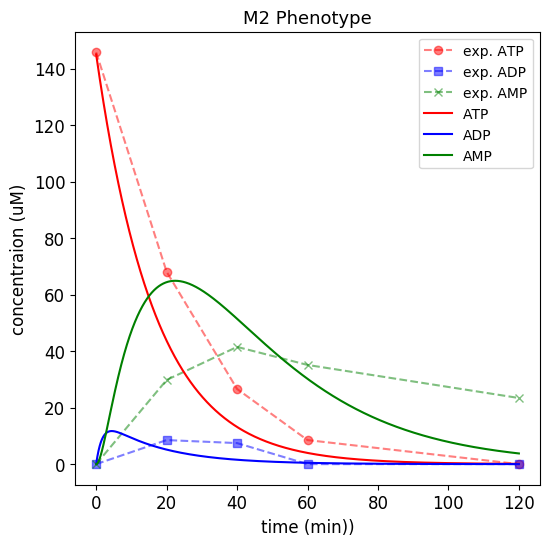

In [77]:
def func(y,t):
    ATP,ADP,AMP,ADO,INO = y
    
    kamp1 = 0.00026
    kamp2 = 0.0011
    degino = 0.001
    CD39 = 2.5
    katp1 = 0.0004
    katp2 = 0.0038

    dATPdt = -katp1*CD39*ATP  
    dADPdt = katp1*CD39*ATP - katp2*ADP*CD39
    dAMPdt = katp2*ADP*CD39 - kamp1*CD39*AMP
    dADOdt = kamp1*CD39*AMP - kamp2*ADO/CD39
    dINOdt = kamp2*ADO/CD39 - degino
    
    dydt = [dATPdt, dADPdt, dAMPdt, dADOdt, dINOdt]
    
    return dydt

t = scipy.linspace(0,60*120,60*120)

y0 = np.array([145,0,0,0,0])
y = scipy.integrate.odeint(func,y0,t)

plt.figure(figsize=(6,6),dpi=100)
plt.tick_params(labelsize=12)

plt.title('M2 Phenotype',fontsize=13)
plt.plot(time,ATPres,'r--o',alpha=0.5,label="exp. ATP")
plt.plot(time,ADPres,'b--s',alpha=0.5,label="exp. ADP")
plt.plot(time,AMPres1,'g--x',alpha=0.5,label="exp. AMP")
plt.plot(t/60,y[:,0],'r-',alpha=1,label='ATP')
plt.plot(t/60,y[:,1],'b-',alpha=1,label='ADP')
plt.plot(t/60,y[:,2],'g-',alpha=1,label='AMP')

plt.xlabel("time (min))",fontsize=12)
plt.ylabel("concentraion (uM)",fontsize=12)
plt.legend(loc=0,fontsize=10)    